In [34]:
"""
merge_datasets.py
------------------
Creates ONE merged CSV by combining:
 - deliveries.csv
 - matches.csv

Output:
 - merged_ipl.csv  (all ball-by-ball data + match metadata)

Place deliveries.csv and matches.csv in the same folder as this script.
"""

import pandas as pd
import sys

def detect_column(df, options):
    """Returns the first matching column name."""
    for col in options:
        if col in df.columns:
            return col
    return None


def main():
    print("\n=== MERGING deliveries.csv + matches.csv INTO ONE FILE ===\n")

    # Load files
    try:
        deliveries = pd.read_csv("deliveries.csv")
        matches = pd.read_csv("matches.csv")
    except:
        print(" ERROR: deliveries.csv or matches.csv missing.")
        sys.exit()

    print("✔ Loaded deliveries.csv & matches.csv\n")

    # Detect match id column
    match_id_del = detect_column(deliveries, ["match_id", "id", "matchID"])
    match_id_mat = detect_column(matches, ["match_id", "id", "matchID"])

    if not match_id_del or not match_id_mat:
        print("Could not find match ID column in one of the files.")
        print("Deliveries columns:", list(deliveries.columns))
        print("Matches columns:", list(matches.columns))
        sys.exit()

    # Rename match id column to standard
    deliveries = deliveries.rename(columns={match_id_del: "match_id"})
    matches = matches.rename(columns={match_id_mat: "match_id"})

    # Select metadata columns if they exist
    meta_cols = [
        col for col in ["match_id", "season", "venue", "date", "team1", "team2"]
        if col in matches.columns
    ]

    match_meta = matches[meta_cols].drop_duplicates()

    print("✔ Match metadata columns detected:", meta_cols)

    # Merge deliveries + metadata
    merged = deliveries.merge(match_meta, on="match_id", how="left")

    # Save final merged file
    merged.to_csv("merged_ipl.csv", index=False)

    print("\n DONE — Your final merged file is ready!")
    print("merged_ipl1.csv created successfully.\n")


if __name__ == "__main__":
    main()



=== MERGING deliveries.csv + matches.csv INTO ONE FILE ===

✔ Loaded deliveries.csv & matches.csv

✔ Match metadata columns detected: ['match_id', 'season', 'venue', 'date', 'team1', 'team2']

 DONE — Your final merged file is ready!
merged_ipl1.csv created successfully.



In [35]:
"""
clean_data.py
Cleans merged IPL dataset and fixes date formats.
"""

import pandas as pd

def main():
    print("\n=== IPL CLEANING SCRIPT STARTED ===\n")

    # Load file
    try:
        df = pd.read_csv("merged_ipl.csv")
        print("Loaded merged_ipl.csv")
    except:
        print(" merged_ipl.csv not found.")
        return

    # ---------------------------
    # Strong date formatter
    # ---------------------------
    if "date" in df.columns:
        print("\n🔧 Fixing date format...")

        df["date"] = pd.to_datetime(
            df["date"],
            errors="coerce",
            dayfirst=True
        )

        invalid_dates = df["date"].isna().sum()
        print(" Date formatted as YYYY-MM-DD")
        print(f" Invalid dates turned into NaT: {invalid_dates}")

    # ---------------------------
    # Normalize text
    # ---------------------------
    text_cols = ["batter", "bowler", "venue", "team1", "team2", "player_dismissed"]
    for col in text_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower().replace({"nan": None})

    # ---------------------------
    # Numeric conversions
    # ---------------------------
    num_cols = ["batsman_runs", "total_runs", "over", "ball", "inning", "match_id"]
    for col in num_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Fill missing
    df[df.select_dtypes(include="number").columns] = df.select_dtypes(include="number").fillna(0)
    df[df.select_dtypes(include="object").columns] = df.select_dtypes(include="object").fillna("unknown")

    # Remove duplicates
    df = df.drop_duplicates()

    # Sort clean data
    sort_cols = [col for col in ["match_id", "inning", "over", "ball"] if col in df.columns]
    df = df.sort_values(sort_cols)

    # Save cleaned dataset
    df.to_csv("clean_ipl.csv", index=False)
    print("\n CLEANING COMPLETE → clean_ipl.csv created\n")


if __name__ == "__main__":
    main()



=== IPL CLEANING SCRIPT STARTED ===



C:\Users\RAKESH\AppData\Local\Temp\ipykernel_15104\3187121897.py:13: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_ipl.csv")
C:\Users\RAKESH\AppData\Local\Temp\ipykernel_15104\3187121897.py:25: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["date"] = pd.to_datetime(


Loaded merged_ipl.csv

🔧 Fixing date format...
 Date formatted as YYYY-MM-DD
 Invalid dates turned into NaT: 0

 CLEANING COMPLETE → clean_ipl.csv created



In [3]:
##EDA SECTION##
print("EDA SECTION")

EDA SECTION


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [13]:
## Objective
print("""The goal of this notebook is to explore the IPL dataset and understand
- Distribution of runs and wickets
- Player performance trends
- Venue-wise statistics
- Team-wise performance patterns""")

The goal of this notebook is to explore the IPL dataset and understand
- Distribution of runs and wickets
- Player performance trends
- Venue-wise statistics
- Team-wise performance patterns


In [14]:
df = pd.read_csv("clean_ipl2.csv")
df.head()

C:\Users\RAKESH\AppData\Local\Temp\ipykernel_15104\1428199865.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("clean_ipl2.csv")


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,fielder,season,venue,date,team1,team2,date_int,year,month,day
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,sc ganguly,p kumar,BB McCullum,0,...,unknown,2007/08,m chinnaswamy stadium,2008-04-18,royal challengers bangalore,kolkata knight riders,1208476800,2008,4,18
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,bb mccullum,p kumar,SC Ganguly,0,...,unknown,2007/08,m chinnaswamy stadium,2008-04-18,royal challengers bangalore,kolkata knight riders,1208476800,2008,4,18
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,bb mccullum,p kumar,SC Ganguly,0,...,unknown,2007/08,m chinnaswamy stadium,2008-04-18,royal challengers bangalore,kolkata knight riders,1208476800,2008,4,18
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,bb mccullum,p kumar,SC Ganguly,0,...,unknown,2007/08,m chinnaswamy stadium,2008-04-18,royal challengers bangalore,kolkata knight riders,1208476800,2008,4,18
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,bb mccullum,p kumar,SC Ganguly,0,...,unknown,2007/08,m chinnaswamy stadium,2008-04-18,royal challengers bangalore,kolkata knight riders,1208476800,2008,4,18


In [15]:
df.shape

(260920, 26)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

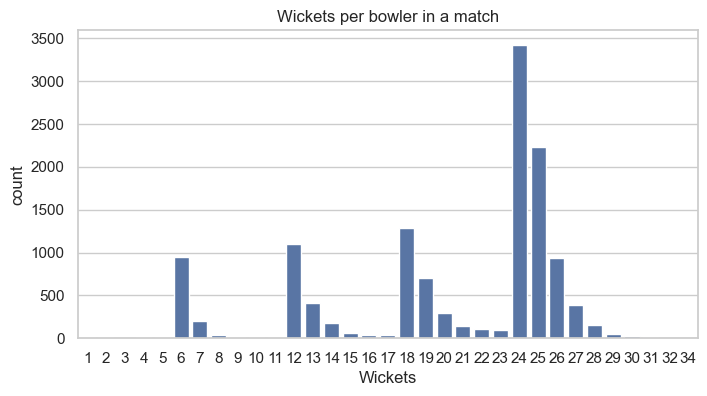

wickets
1       17
2       15
3        4
4        9
5       12
6      952
7      200
8       43
9       20
10      12
11      19
12    1098
13     411
14     176
15      62
16      43
17      41
18    1288
19     700
20     292
21     146
22     107
23      95
24    3421
25    2235
26     932
27     386
28     150
29      48
30      26
31      12
32       4
34       2
Name: count, dtype: int64

In [17]:
df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,date_int,year,month,day
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,2.609200e+05,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632,1.467960e+09,2016.161007,4.827208,15.800287
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184,1.571555e+08,4.951596,1.619753,8.471132
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.208477e+09,2008.000000,3.000000,1.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.335053e+09,2012.000000,4.000000,9.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.462493e+09,2016.000000,4.000000,16.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.618618e+09,2021.000000,5.000000,23.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000,1.716682e+09,2024.000000,11.000000,31.000000


In [18]:
#Missing Values Check
df.isna().sum().sort_values(ascending=False)


match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
season              0
venue               0
date                0
team1               0
team2               0
date_int            0
year                0
month               0
day                 0
dtype: int64

In [19]:
df.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'venue', 'date', 'team1',
       'team2', 'date_int', 'year', 'month', 'day'],
      dtype='object')

In [21]:

# Standardize commonly used columns
df.rename(columns={
    'batsman_runs': 'runs'
}, inplace=True)


In [22]:
 print("""Majority of deliveries result in 0 or 1 run
 Boundaries (4 and 6) occur less frequently
 Distribution is right-skewed, which is expected in T20 cricket""")

Majority of deliveries result in 0 or 1 run
Boundaries (4 and 6) occur less frequently
Distribution is right-skewed, which is expected in T20 cricket


In [24]:
#Runs per Match (Batsman Performance)
runs_per_match = df.groupby(
    ['match_id', 'batter']
)['runs'].sum()


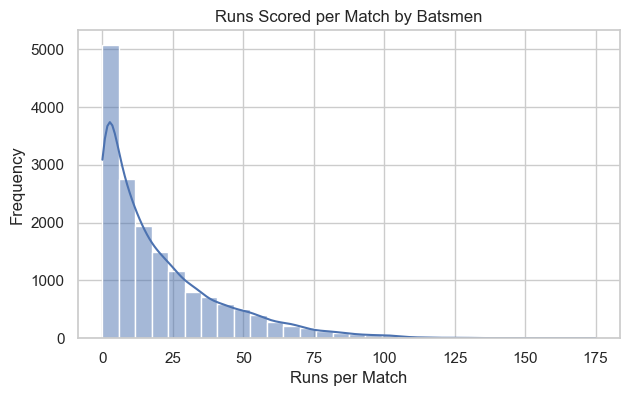

In [25]:
plt.figure(figsize=(7,4))
sns.histplot(runs_per_match, bins=30, kde=True)
plt.title("Runs Scored per Match by Batsmen")
plt.xlabel("Runs per Match")
plt.ylabel("Frequency")
plt.show()


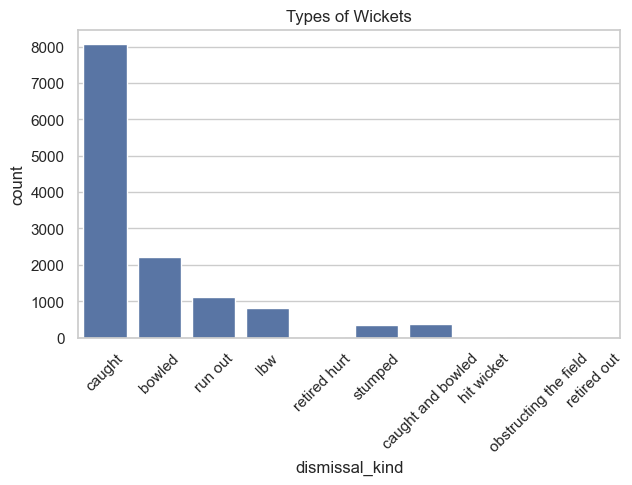

In [26]:
#Wickets Analysis (Correct for Data)
wickets = df[df['is_wicket'] == 1]

plt.figure(figsize=(7,4))
sns.countplot(x=wickets['dismissal_kind'])
plt.title("Types of Wickets")
plt.xticks(rotation=45)
plt.show()


In [27]:
#Wickets per Match (Bowler)
wickets_per_match = df[df['is_wicket'] == 1].groupby(
    ['match_id', 'bowler']
).size()


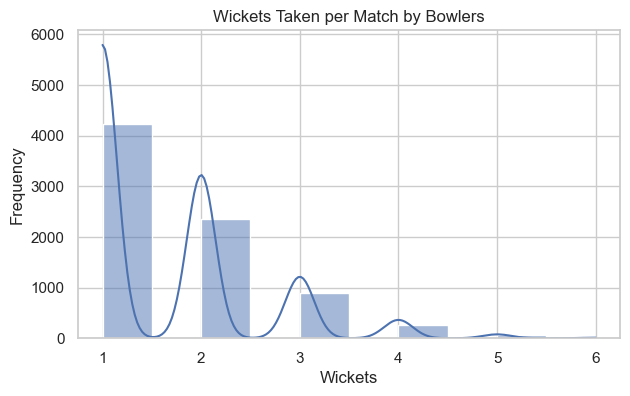

In [28]:
plt.figure(figsize=(7,4))
sns.histplot(wickets_per_match, bins=10, kde=True)
plt.title("Wickets Taken per Match by Bowlers")
plt.xlabel("Wickets")
plt.ylabel("Frequency")
plt.show()

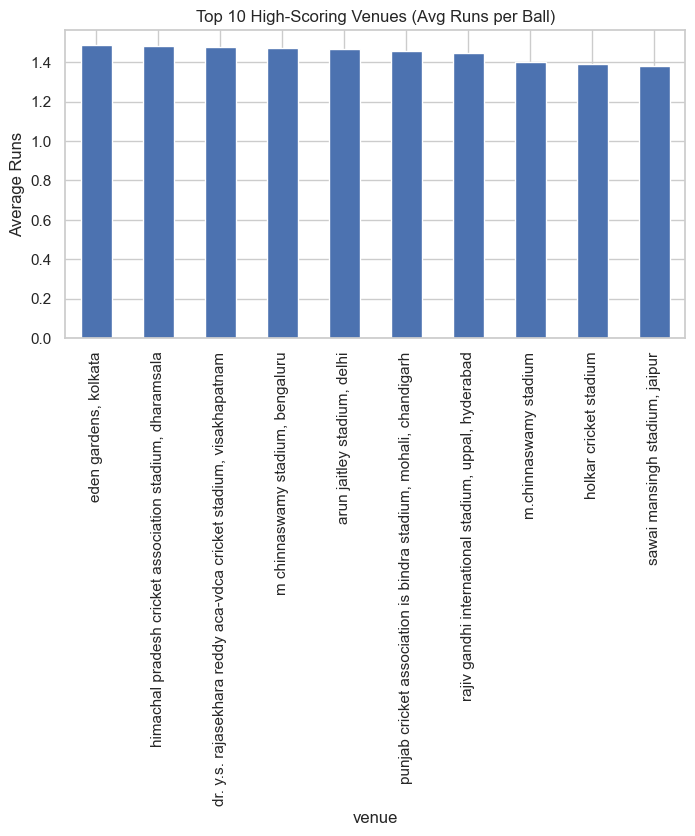

In [29]:
#Venue-wise Batting Analysis

venue_runs = df.groupby('venue')['runs'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
venue_runs.plot(kind='bar')
plt.title("Top 10 High-Scoring Venues (Avg Runs per Ball)")
plt.ylabel("Average Runs")
plt.show()


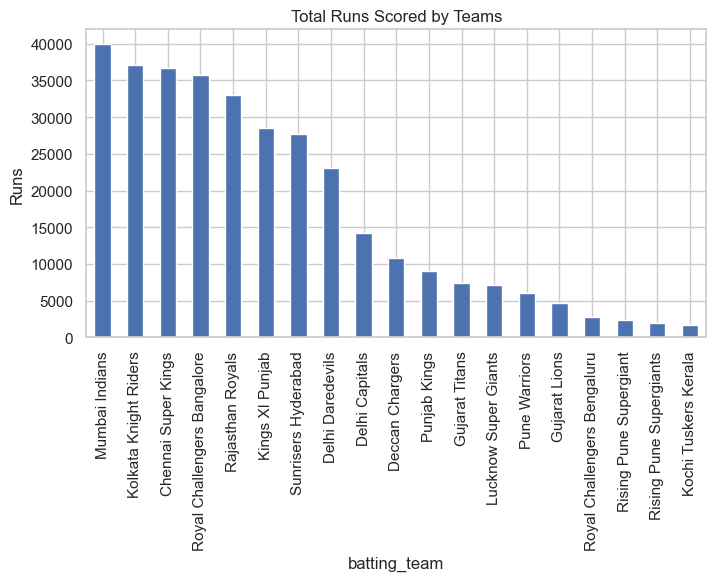

In [30]:
#Team Performance – Batting
team_runs = df.groupby('batting_team')['runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
team_runs.plot(kind='bar')
plt.title("Total Runs Scored by Teams")
plt.ylabel("Runs")
plt.show()

In [31]:
#Team Performance – Bowling
team_wickets = df[df['is_wicket'] == 1].groupby(
    'bowling_team'
).size().sort_values(ascending=False)


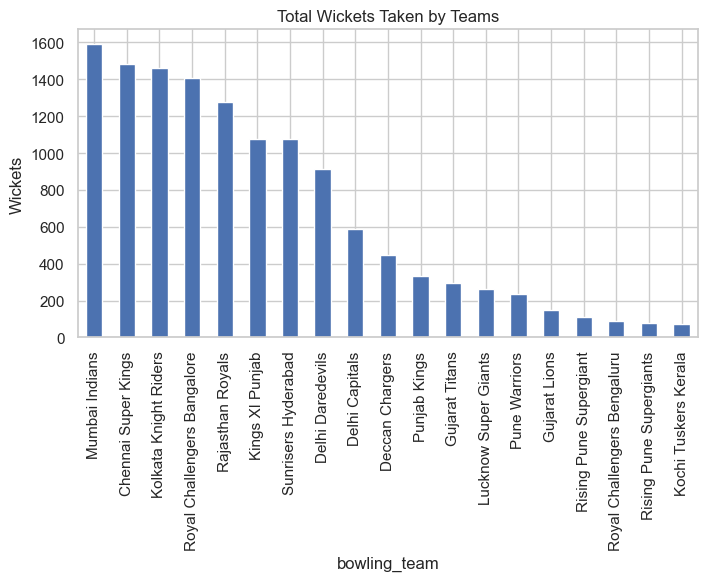

In [32]:
plt.figure(figsize=(8,4))
team_wickets.plot(kind='bar')
plt.title("Total Wickets Taken by Teams")
plt.ylabel("Wickets")
plt.show()



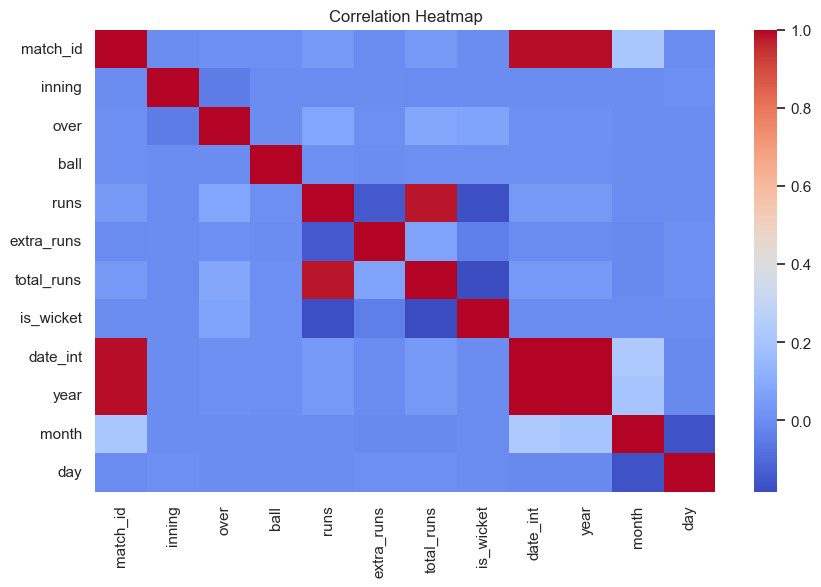

In [33]:
#Correlation Heatmap (Numeric)
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()
